In [235]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [236]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

In [237]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [239]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [240]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [241]:
cols = pd.Series(list(train.columns))
cols

0     PassengerId
1        Survived
2          Pclass
3            Name
4             Sex
5             Age
6           SibSp
7           Parch
8          Ticket
9            Fare
10          Cabin
11       Embarked
dtype: object

In [242]:
X_train = train.drop(['PassengerId', 'Survived'], axis=1)
X_test = test.drop(['PassengerId'], axis=1)

In [243]:
# Features
def create_features(X):
    subs = {'female': 1, 'male': 0}
    X['Woman'] = X['Sex'].replace(subs)

    X['Age'] = X['Age'].fillna(X['Age'].mean())

    X['Fare'] = X['Fare'].fillna(X['Fare'].mean())

    X['Embarked'] = X['Embarked'].fillna('S')

    subs = {'S': 1, 'C': 2, 'Q':3}
    X['Harbor'] = X['Embarked'].replace(subs)

    X['Kid'] = 1
    X['Kid'] = np.where(X['Age'] < 12, 1, 0)

    return X
    
X_train = create_features(X_train)
X_test = create_features(X_test)

/tmp/ipykernel_17840/1106882238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Woman'] = X['Sex'].replace(subs)
/tmp/ipykernel_17840/1106882238.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Harbor'] = X['Embarked'].replace(subs)
/tmp/ipykernel_17840/1106882238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [244]:
# Selecionando as features
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Woman', 'Harbor', 'Kid']

X_train = X_train[features]
X_test = X_test[features]

y_train = train['Survived']

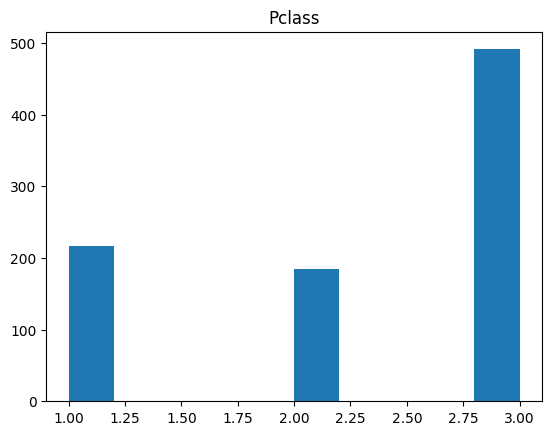

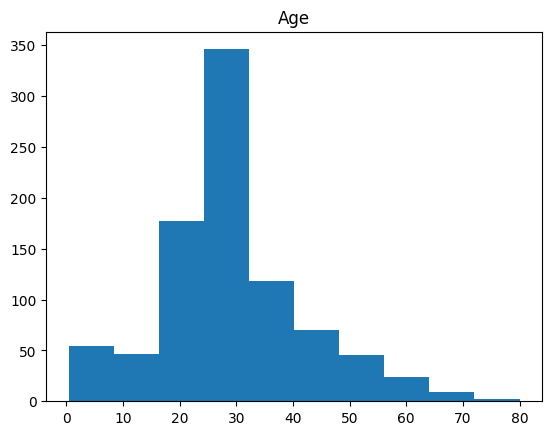

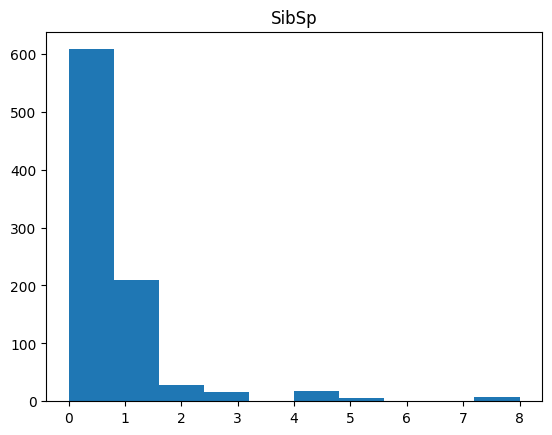

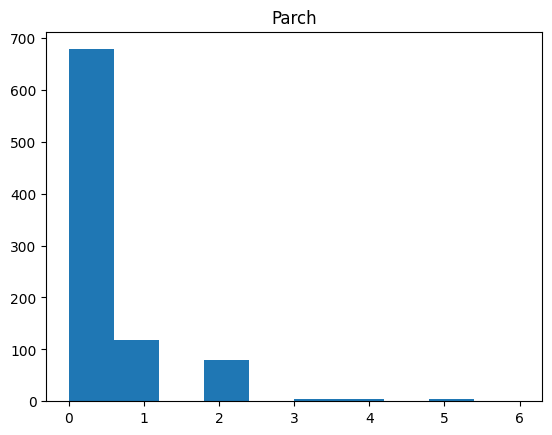

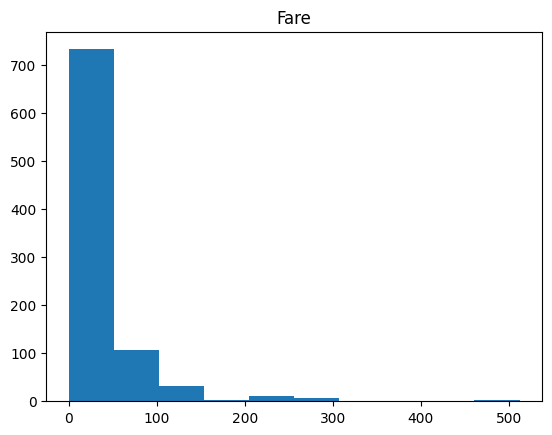

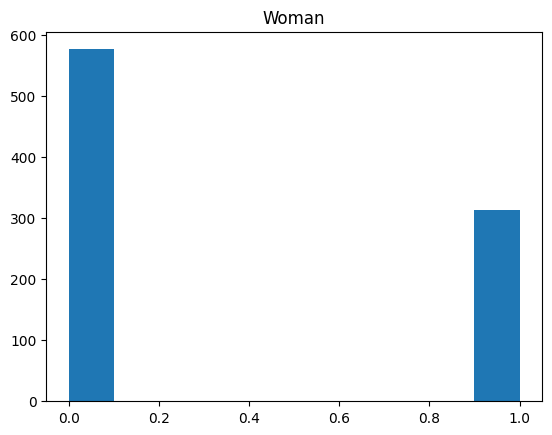

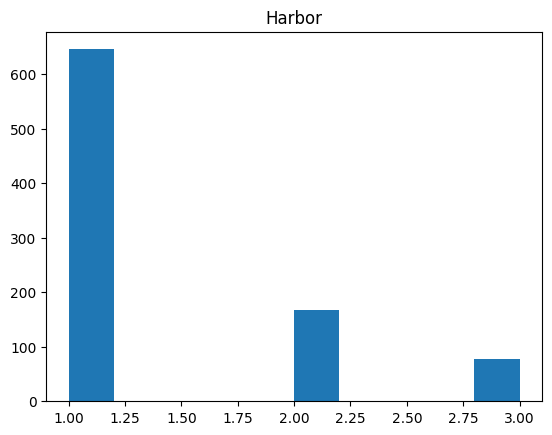

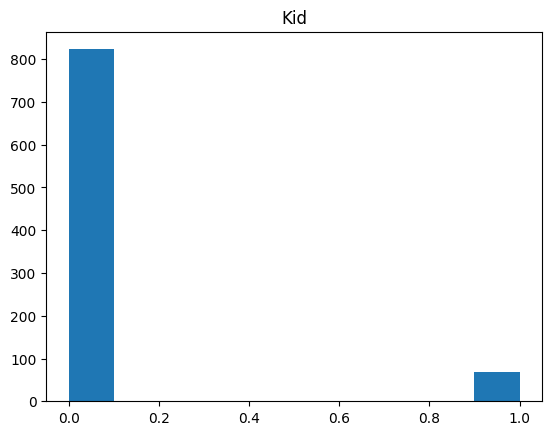

In [245]:
# Visualização dos dados
for i in X_train.columns:
    plt.hist(X_train[i])
    plt.title(i)
    plt.show()

In [246]:
train.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [247]:
pd.pivot_table(train, index=['Survived'], columns=['Embarked'], values='PassengerId', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [248]:
pd.pivot_table(train, index=['Survived'], columns=['Pclass'], values='PassengerId', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [249]:
# Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [250]:
# Modelo e validação cruzada
model = LogisticRegression(max_iter=1000, random_state=0)

score = cross_val_score(model, X_train, y_train, cv=10)

score = np.mean(score)

f'Model score: {score.round(4)}%'

'Model score: 0.8047%'

In [251]:
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

ms = confusion_matrix(y_train, y_pred)

print(f'Matriz de confusão: {ms}')

score = model.score(X_train, y_train)

print(f'Score: {score}')

Matriz de confusão: [[479  70]
 [ 98 244]]
Score: 0.8114478114478114


In [252]:
y_pred = model.predict(X_test)

submission = pd.DataFrame(test['PassengerId'])
submission['Survived'] = y_pred

submission.to_csv('submission1.csv', index=False)